In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import pandas as pd
sys.path.insert(0, "../src")
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from os.path import join as oj
import configparser
pd.set_option('display.float_format', lambda x: '%.2f' % x)

config = configparser.ConfigParser()
config.read('../config.ini');
data_path =config['DATASET']['data_path'] 
from torch.nn import functional as F

In [25]:
fnames = sorted([oj(config['PATHS']['model_path'] , fname) for fname in os.listdir(config['PATHS']['model_path'] ) if "pkl" in fname]) 
results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 

results = pd.concat(results_list, axis=1).T.infer_objects()

results.experiment_name.unique()
results['best_val_score'] = [max(x) for x in results.val_scores]
results[['foldername',  'final_dice_score','cost_function', 'add_ratio','experiment_name']].groupby([ 'experiment_name','foldername','add_ratio',  'cost_function']).mean()

final_dice_score
experiment_name      foldername   add_ratio cost_function                     
00Aquisition         lno_halfHour 0.02      uncertainty_cost              0.91
                                  0.05      uncertainty_cost              0.92
                                  0.25      uncertainty_cost              0.95
01Aquisition         lno_halfHour 0.02      random_cost                   0.90
                                            uncertainty_cost              0.91
                                  0.05      random_cost                   0.84
                                            uncertainty_cost              0.92
BaselineFullDataset  lno          0.00      uncertainty_cost              0.96
BaselineNoAquisition lno_halfHour 0.00      random_cost                   0.81
PresentationNetworks lno_halfHour 0.05      uncertainty_cost              0.92

In [15]:
noaquisition_results = results[results.experiment_name == 'RealValBaselineNoAquisition']#[results.cost_function == '']
for i, j in noaquisition_results.val_scores.iteritems():
    plt.plot(j, label=i, c= 'b')
    print(len(j))
full_results = results[results.experiment_name == 'BaselineFullDataset']#[results.cost_function == '']
for i, j in full_results.val_scores.iteritems():
    plt.plot(j, label=i, c= 'g')
    print(i)
    print(len(j))
aquisition_results = results[results.experiment_name == '15weights'][results.cost_function == 'uncertainty_cost']
for i, j in aquisition_results.val_scores.iteritems():
    plt.plot(j, label=i, c= 'r')
    print(len(j))

C:\Users\lauri\AppData\Local\Temp\ipykernel_11548\875341052.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aquisition_results = results[results.experiment_name == '15weights'][results.cost_function == 'uncertainty_cost']


In [ ]:
for 

In [25]:
plt.plot(test_results.val_scores[0])

KeyError: 0

In [21]:
plt.plot(test_results.val_scores[0])

KeyError: 0

In [20]:
test_results = results[results.experiment_name == '09deepcopy'][results.cost_function == 'random_cost']
test_results[['seed', 'final_dice_score']]

C:\Users\lauri\AppData\Local\Temp\ipykernel_11544\3402711740.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_results = results[results.experiment_name == '09deepcopy'][results.cost_function == 'random_cost']


,seed,final_dice_score
31,0,0.90
33,2,0.88
63,1,0.90


In [15]:
print([x for x in test_results[test_results.seed == 2].val_scores])

[[0.3839453160762787, 0.6779708862304688, 0.7346013784408569, 0.8609182238578796, 0.5011327862739563, 0.6633269786834717, 0.7820200324058533, 0.7838071584701538, 0.8384112119674683, 0.8783949613571167, 0.839293897151947, 0.8645076751708984, 0.7128674983978271, 0.7335828542709351, 0.8441758155822754, 0.7127550840377808, 0.5678970813751221, 0.573646068572998, 0.7795277833938599, 0.8649921417236328, 0.8829208612442017, 0.8792891502380371, 0.876971960067749, 0.8884662389755249, 0.8850383758544922, 0.8957514762878418, 0.8844620585441589, 0.8973028063774109, 0.6338602900505066, 0.5334702134132385, 0.6192382574081421, 0.8954148292541504, 0.8891618251800537, 0.8944959044456482, 0.87877357006073, 0.889626681804657, 0.8946825265884399, 0.8922185897827148, 0.8909916281700134, 0.8966187834739685, 0.8970856666564941, 0.8912065029144287, 0.8786999583244324]]


In [101]:
test_results

,file_name,epochs,batch_size,cost_function,add_ratio,foldername,poolname,experiment_name,lr,image_size,...,seed,scale,val,amp,bilinear,classes,val_scores,num_classes,final_dice_score,best_val_score
8,2017158786,250,128,random_cost,0.02,lno_halfHour,lno,06comparisonRealVal,0.00,128,...,0,0.50,10,False,False,6,"[0.39132440090179443, 0.6492416262626648, 0.66...",3,0.79,0.88
13,3393829644,250,128,random_cost,0.02,lno_halfHour,lno,06comparisonRealVal,0.00,128,...,1,0.50,10,False,False,6,"[0.5830602049827576, 0.6723089218139648, 0.560...",3,0.94,0.89
26,5742020891,250,128,random_cost,0.02,lno_halfHour,lno,06comparisonRealVal,0.00,128,...,2,0.50,10,False,False,6,"[0.41431063413619995, 0.5379415154457092, 0.64...",3,0.79,0.89


In [114]:
test_results[test_results.seed == 0].final_dice_score

8   0.79
Name: final_dice_score, dtype: float64

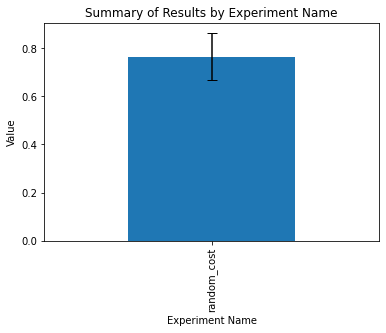

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data into a pandas DataFrame
# df = pd.read_csv("your_data.csv")

# Group the data by experiment name
show_results = results[results.experiment_name == "RealValBaselineNoAquisition"]
grouped = show_results.groupby("cost_function")

# Calculate the mean and standard deviation for each group
means = grouped.final_dice_score.mean()
stds = grouped.final_dice_score.std()

# Plot the data as a bar chart
means.plot(kind="bar", yerr=stds, capsize=5)

# Add axis labels and a title
plt.xlabel("Experiment Name")
plt.ylabel("Value")
plt.title("Summary of Results by Experiment Name")

# Show the plot
plt.show()

In [3]:
results[['experiment_name', 'file_name',  'cost_function',]]

,experiment_name,file_name,cost_function
0,RandomUncertaintyComparison,0027818139,random_cost
1,RandomUncertaintyComparison,0267865227,random_cost
2,02RandomUncertaintyComparison,0610284810,uncertainty_cost
3,02RandomUncertaintyComparison,0776757766,random_cost
4,RandomUncertaintyComparison,1121698192,random_cost
5,RandomUncertaintyComparison,1371175461,random_cost
6,RandomUncertaintyComparison,1514917295,uncertainty_cost
7,RandomUncertaintyComparison,2403052031,uncertainty_cost
8,RandomUncertaintyComparison,2605857076,uncertainty_cost
9,RandomUncertaintyComparison,2632218019,random_cost


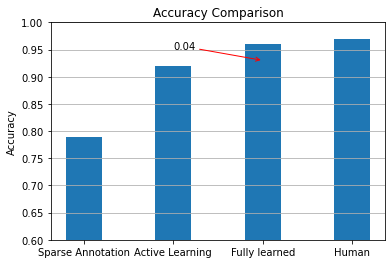

In [63]:
import matplotlib.pyplot as plt

results_dict = {"Sparse Annotation": 0.79,  "Active Learning": 0.92, "Fully learned": 0.96, 'Human' : 0.97, }

fig, ax = plt.subplots()
ax.bar(results_dict.keys(), results_dict.values(), width=0.4, align='center')
ax.set_ylim([0.6, 1])
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.grid(True, which='both', axis='y')

# Highlight the small difference between Active Learning and Fully learned
ax.annotate(f'{results_dict["Fully learned"] - results_dict["Active Learning"]:.2f}',
            xy=("Fully learned", results_dict["Fully learned"] - 0.03), 
            xytext=("Active Learning", results_dict["Active Learning"] + 0.03),
            arrowprops={'arrowstyle': '->', 'color': 'red'})

plt.show()